In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
losses = np.load("losses.npy")

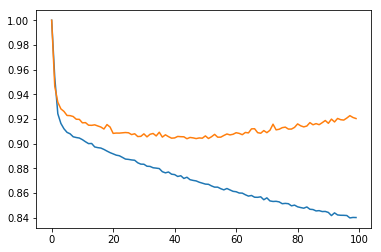

In [3]:
plt.plot(losses[:, 0]/losses[:, 0].max())
plt.plot(losses[:, 1]/losses[:, 1].max())

In [4]:
test_samples = np.load("./vae3/test_out_49.npy")

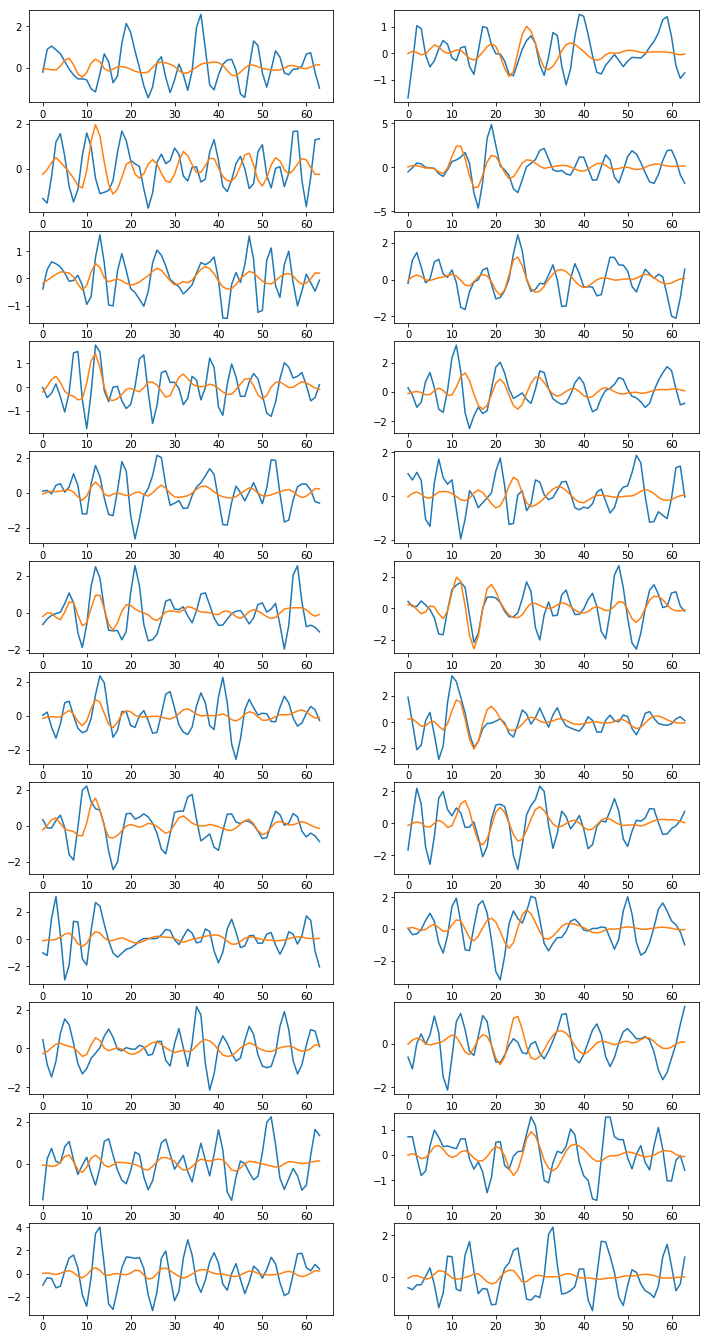

In [5]:
test_samples = np.load("./vae3/test_out_49.npy")

fig, ax = plt.subplots(12, 2, figsize=(12, 24))
for i in range(12):
    ax[i, 0].plot(range(64), test_samples[0, i, 0], )
    ax[i, 0].plot(range(64), test_samples[1, i, 0], )

for i in range(12):
    ax[i, 1].plot(range(64), test_samples[0, i, 1], )
    ax[i, 1].plot(range(64), test_samples[1, i, 1], )

In [14]:
all_sampled = np.load("./vae2/out_all_epoch_49.npy")
near_traces = np.load("./near_traces_64.npy")
far_traces = np.load("./far_traces_64.npy")

print(all_sampled.shape)
well_i, well_x = 38, 138
well_variance_near = np.mean(np.std(near_traces[well_i-2:well_i+1, well_x-2:well_x+1], 2))
well_variance_far = np.mean(np.std(far_traces[well_i-2:well_i+1, well_x-2:well_x+1], 2))
near_traces /= well_variance_near
far_traces /= well_variance_far

(25351, 2, 64)


In [15]:
counts = []
count = 0
for i in range(near_traces.shape[0]):
    for j in range(near_traces.shape[1]):
        if i in [36, 37, 38, 39, 40] and j in [136, 137, 138, 139, 140]:
            counts.append(count)
        count += 1
print(counts)        

[9172, 9173, 9174, 9175, 9176, 9423, 9424, 9425, 9426, 9427, 9674, 9675, 9676, 9677, 9678, 9925, 9926, 9927, 9928, 9929, 10176, 10177, 10178, 10179, 10180]


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].imshow(all_sampled.reshape(101, 251, 2, 64)[38, :, 0, :].T)
ax[1].imshow(all_sampled.reshape(101, 251, 2, 64)[38, :, 1, :].T)
ax[0].axvline(138, color="red", alpha=0.5, linewidth=1)
ax[1].axvline(138, color="red", alpha=0.5, linewidth=1)

Text(0.5,1,'Far Offset')

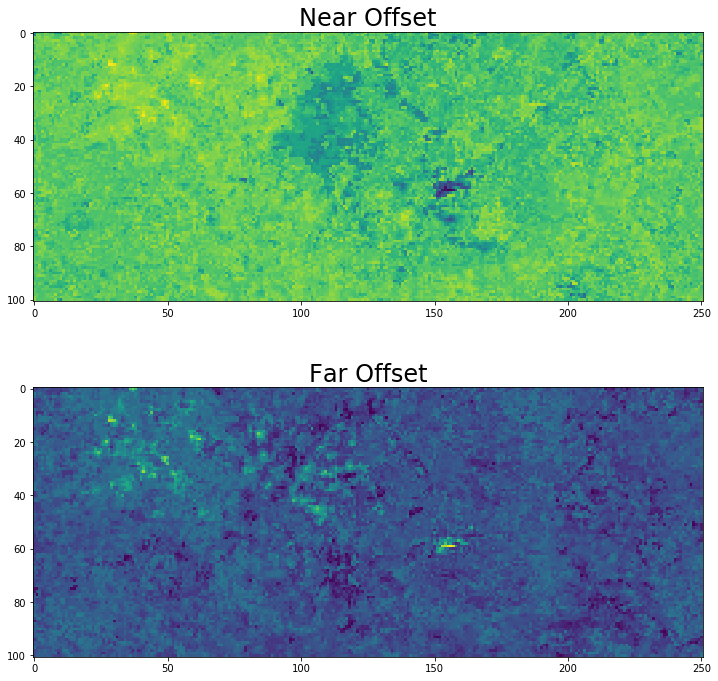

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
near_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 0, :]
far_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 1, :]
ax[0].imshow(np.mean(near_sampled, 2))
sc = ax[1].imshow(np.mean(far_sampled, 2))
ax[0].set_title("Near Offset", fontsize=24)
ax[1].set_title("Far Offset", fontsize=24)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
near_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 0, :]
far_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 1, :]
vmin = near_traces.min()
vmax = near_traces.max()
print(vmin, vmax, near_sampled.min())#, near_sampled.max())
ax[0, 1].imshow(np.mean(near_sampled, 2))#, vmin=vmin, vmax=vmax)
sc = ax[1, 1].imshow(np.mean(far_sampled, 2))#, vmin=vmin, vmax=vmax)
ax[0, 1].set_title("Near Offset", fontsize=24)
ax[1, 1].set_title("Far Offset", fontsize=24)

ax[0, 0].imshow(np.mean(near_traces, 2))#, vmin=vmin, vmax=vmax)
sc = ax[1, 0].imshow(np.mean(far_traces, 2))#, vmin=vmin, vmax=vmax)
ax[0, 0].set_title("Near Offset", fontsize=24)
ax[1, 0].set_title("Far Offset", fontsize=24)

-5.895588494848423 6.0386670251870616 -2.9714463 4.2996984


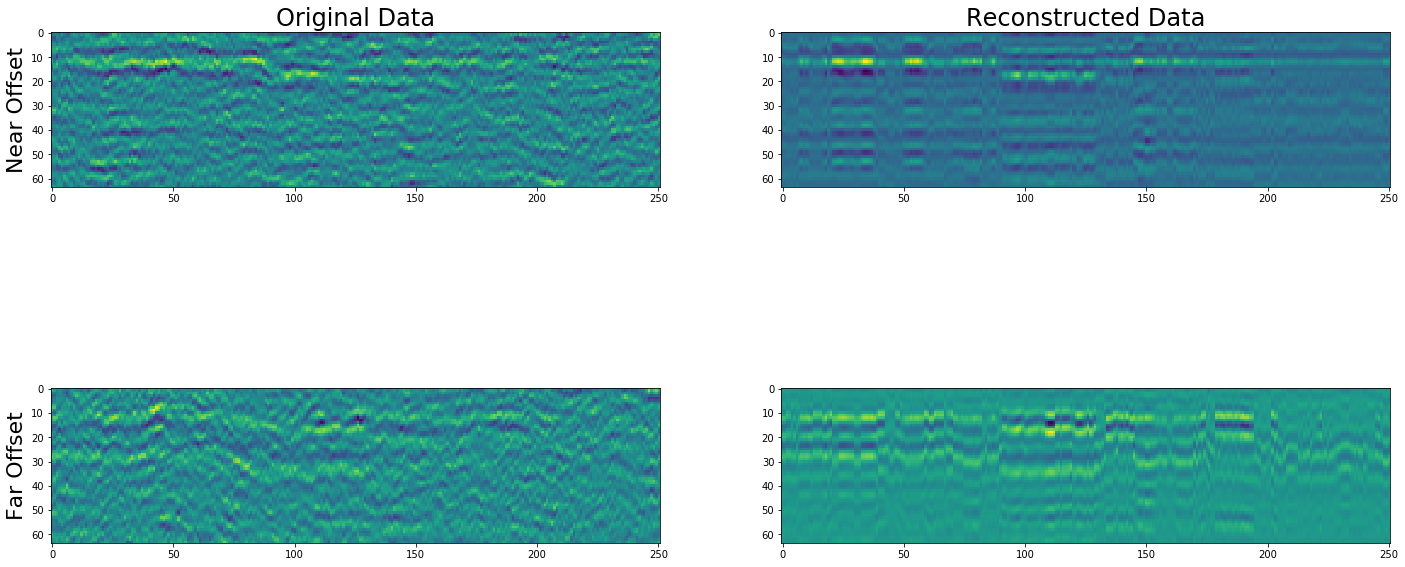

In [109]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))
near_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 0, :]
far_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 1, :]
print(vmin, vmax, near_sampled.min(), near_sampled.max())
ax[0, 1].imshow(near_sampled[38, :].T)#, vmin=vmin, vmax=vmax)
sc = ax[1, 1].imshow(far_sampled[38, :].T)#, vmin=vmin, vmax=vmax)
ax[0, 0].set_title("Original Data", fontsize=24)
ax[0, 1].set_title("Reconstructed Data", fontsize=24)

ax[0, 0].imshow(near_traces[38].T)#, vmin=vmin, vmax=vmax)
sc = ax[1, 0].imshow(far_traces[38].T)#, vmin=vmin, vmax=vmax)
ax[0, 0].set_ylabel("Near Offset", fontsize=22)
ax[1, 0].set_ylabel("Far Offset", fontsize=22)
fig.savefig("comparison_real_and_reconstructed_line.png", dpi=300, bbox_inches="tight")

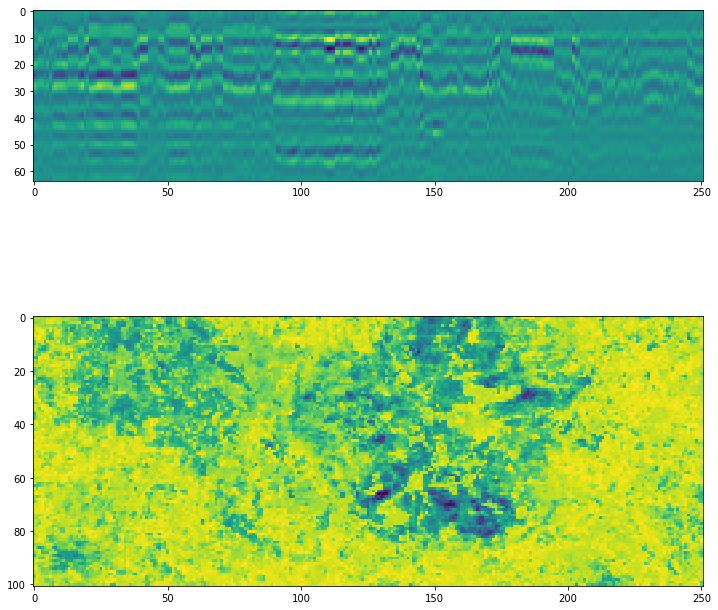

In [65]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
near_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 0, :]
far_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 1, :]
sc = ax[0].imshow((far_sampled-near_sampled)[38, :].T)
ax[1].imshow(np.min(far_sampled-near_sampled, 2))

In [105]:
x_avo = near_sampled.reshape(-1, 1)
y_avo = far_sampled.reshape(-1, 1)-x_avo
print(x_avo.shape, y_avo.shape)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=1)
lin_reg.fit(x_avo, y_avo)
print(lin_reg.coef_)

(1622464, 1) (1622464, 1)
[[-0.38364792]]


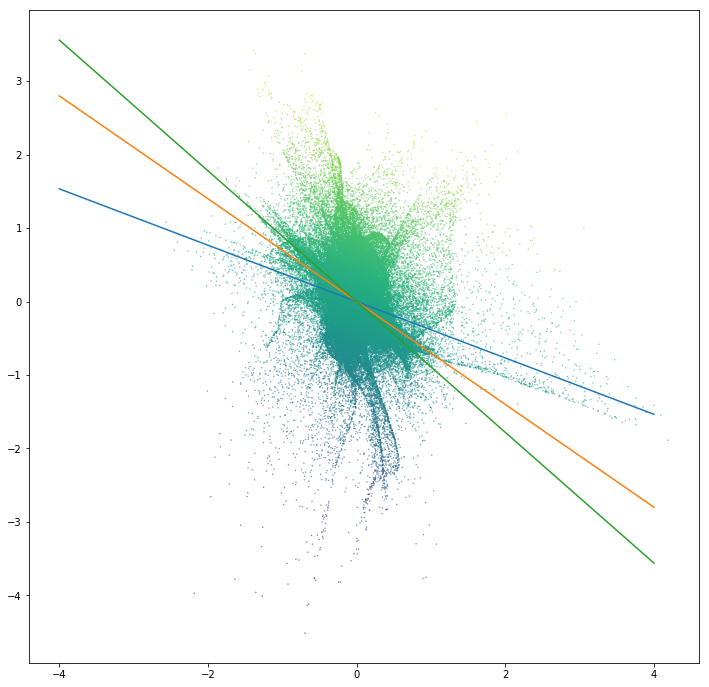

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(x_avo[::10], y_avo[::10], s=0.1, c=FF.reshape(-1, 1)[::10])
ax.plot(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)*lin_reg.coef_[0, 0])
ax.plot(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)*-0.7)
ax.plot(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)*-0.89)

In [106]:
FF = y_avo-lin_reg.coef_*x_avo
FF = FF.reshape(*traces.shape)
print(lin_reg.coef_)
RF = lin_reg.coef_*y_avo+x_avo
RF = RF.reshape(*traces.shape)

x_avo_d = near_traces.reshape(-1, 1)
y_avo_d = far_traces.reshape(-1, 1)-x_avo_d

FF_d = y_avo_d+0.89*x_avo_d
FF_d = FF_d.reshape(*traces.shape)
RF_d = -0.89*y_avo_d+x_avo_d
RF_d = RF_d.reshape(*traces.shape)

[[-0.38364792]]


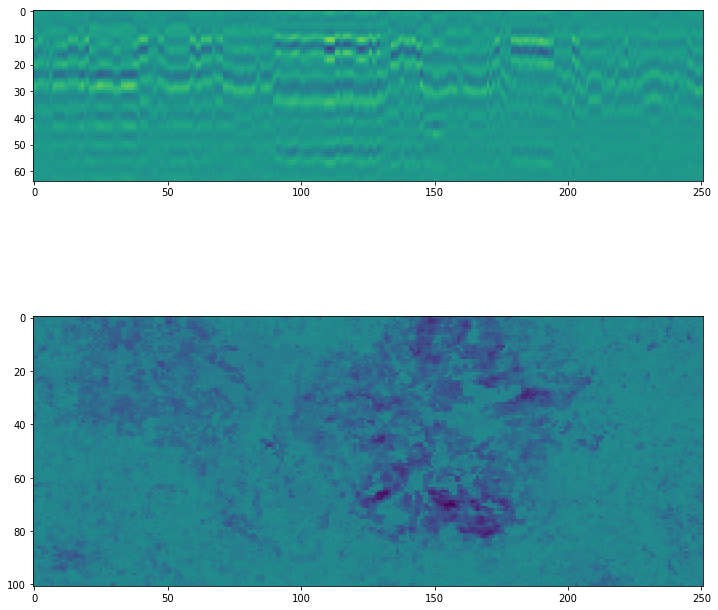

In [80]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
near_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 0, :]
far_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 1, :]
sc = ax[0].imshow(FF[38, :].T, vmin=FF.min(), vmax=FF.max())
ax[1].imshow(np.min(FF, 2), vmin=FF.min(), vmax=FF.max())

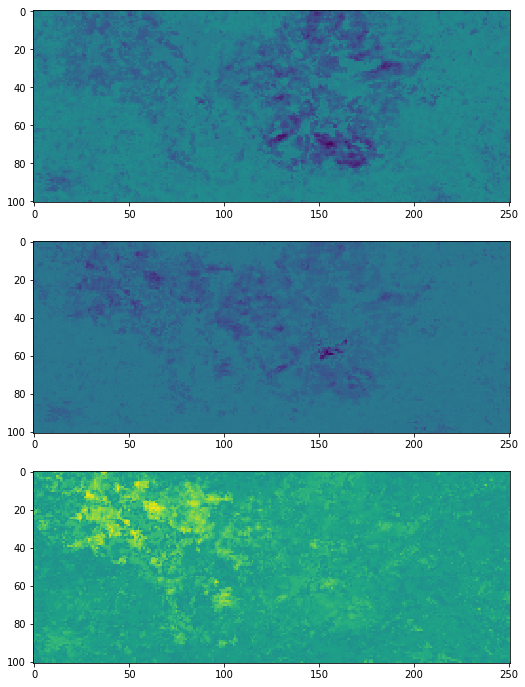

In [84]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
near_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 0, :]
far_sampled = all_sampled.reshape(101, 251, 2, 64)[:, :, 1, :]
ax[0].imshow(np.min(FF, 2), vmin=FF.min(), vmax=FF.max())
ax[1].imshow(np.min(RF, 2), vmin=RF.min(), vmax=RF.max())
ax[2].imshow(np.max(RF, 2), vmin=RF.min(), vmax=RF.max())
#ax[2].imshow(np.mean(RF-FF, 2), vmin=(RF-FF).min(), vmax=(RF-FF).max())

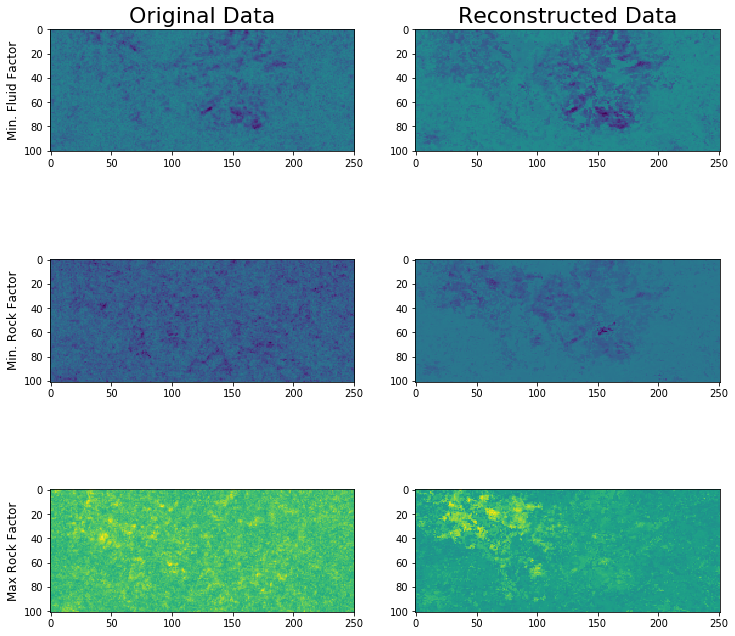

In [101]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

ax[0, 0].imshow(np.min(FF_d, 2), vmin=FF_d.min(), vmax=FF_d.max())
ax[1, 0].imshow(np.min(RF_d, 2), vmin=RF_d.min(), vmax=RF_d.max())
ax[2, 0].imshow(np.max(RF_d, 2), vmin=RF_d.min(), vmax=RF_d.max())

ax[0, 1].imshow(np.min(FF, 2), vmin=FF.min(), vmax=FF.max())
ax[1, 1].imshow(np.min(RF, 2), vmin=RF.min(), vmax=RF.max())
ax[2, 1].imshow(np.max(RF, 2), vmin=RF.min(), vmax=RF.max())

ax[0, 0].set_ylabel("Min. Fluid Factor", fontsize=12)
ax[1, 0].set_ylabel("Min. Rock Factor", fontsize=12)
ax[2, 0].set_ylabel("Max Rock Factor", fontsize=12)

ax[0, 0].set_title("Original Data", fontsize=22)
ax[0, 1].set_title("Reconstructed Data", fontsize=22)
fig.savefig("comparison_near_far.png", dpi=300, bbox_inches="tight")

In [103]:
FF = y_avo+0.89*x_avo
FF = FF.reshape(*traces.shape)
print(lin_reg.coef_)
RF = -0.89*y_avo+x_avo
RF = RF.reshape(*traces.shape)

x_avo_d = near_traces.reshape(-1, 1)
y_avo_d = far_traces.reshape(-1, 1)-x_avo_d

FF_d = y_avo_d+0.89*x_avo_d
FF_d = FF_d.reshape(*traces.shape)
RF_d = -0.89*y_avo_d+x_avo_d
RF_d = RF_d.reshape(*traces.shape)

[[-0.38364792]]


Text(0.5,1,'Reconstructed Data')

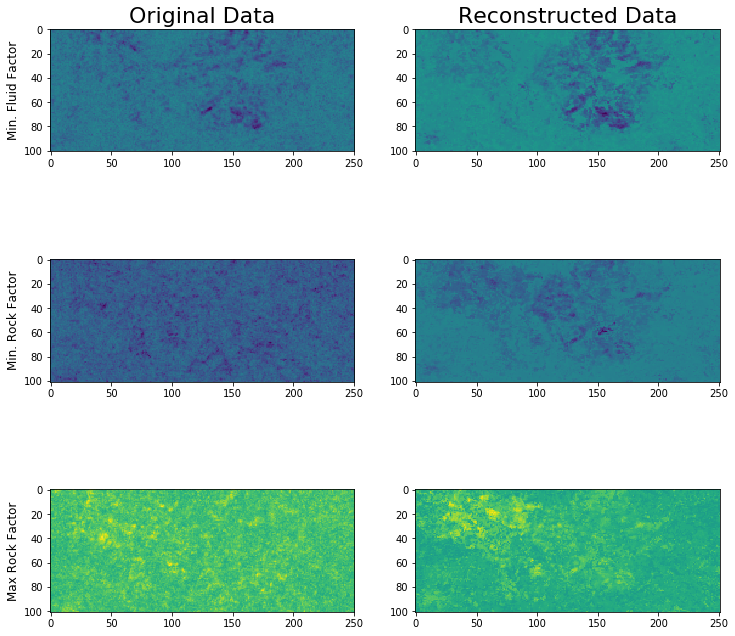

In [104]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

ax[0, 0].imshow(np.min(FF_d, 2), vmin=FF_d.min(), vmax=FF_d.max())
ax[1, 0].imshow(np.min(RF_d, 2), vmin=RF_d.min(), vmax=RF_d.max())
ax[2, 0].imshow(np.max(RF_d, 2), vmin=RF_d.min(), vmax=RF_d.max())

ax[0, 1].imshow(np.min(FF, 2), vmin=FF.min(), vmax=FF.max())
ax[1, 1].imshow(np.min(RF, 2), vmin=RF.min(), vmax=RF.max())
ax[2, 1].imshow(np.max(RF, 2), vmin=RF.min(), vmax=RF.max())

ax[0, 0].set_ylabel("Min. Fluid Factor", fontsize=12)
ax[1, 0].set_ylabel("Min. Rock Factor", fontsize=12)
ax[2, 0].set_ylabel("Max Rock Factor", fontsize=12)

ax[0, 0].set_title("Original Data", fontsize=22)
ax[0, 1].set_title("Reconstructed Data", fontsize=22)
#fig.savefig("comparison_near_far.png", dpi=300, bbox_inches="tight")

In [43]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

ax[0, 0].imshow(np.min(FF_d, 2), vmin=FF_d.min(), vmax=FF_d.max())
ax[1, 0].imshow(np.min(RF_d, 2), vmin=RF_d.min(), vmax=RF_d.max())
ax[2, 0].imshow(np.max(RF_d, 2), vmin=RF_d.min(), vmax=RF_d.max())

ax[0, 1].imshow(np.min(FF, 2), vmin=FF.min(), vmax=FF.max())
ax[1, 1].imshow(np.min(RF, 2), vmin=RF.min(), vmax=RF.max())
ax[2, 1].imshow(np.max(RF, 2), vmin=RF.min(), vmax=RF.max())

ax[0, 0].set_ylabel("Min. Fluid Factor", fontsize=12)
ax[1, 0].set_ylabel("Min. Rock Factor", fontsize=12)
ax[2, 0].set_ylabel("Max Rock Factor", fontsize=12)

ax[0, 0].set_title("Original Data", fontsize=22)
ax[0, 1].set_title("Reconstructed Data", fontsize=22)
fig.savefig("comparison_near_far.png", dpi=300, bbox_inches="tight")

print(zs.shape)

(25351, 2)


In [30]:
zs = np.load("./vae3/out_all_zs_epoch_49.npy")

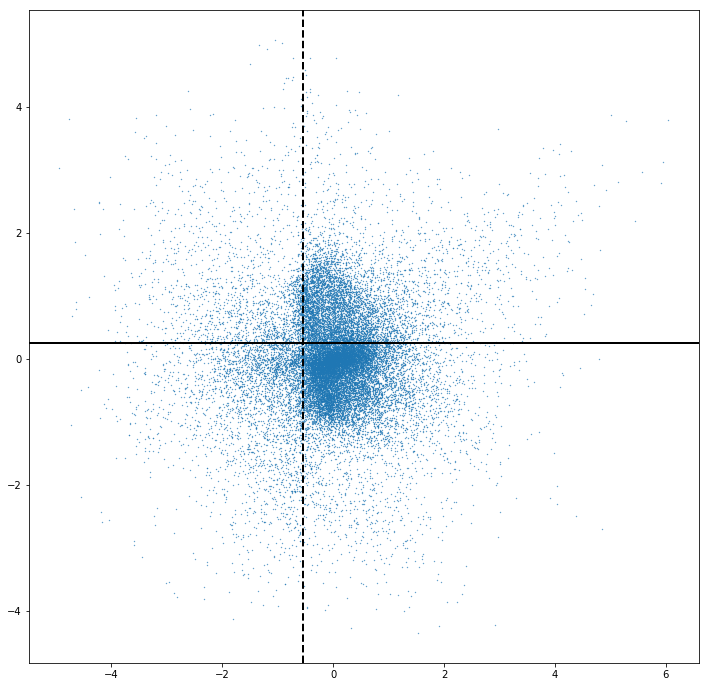

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sc = ax.scatter(zs[:, 0], zs[:, 1], s=0.1)#, c=np.min(FF, 2).reshape(-1))
#fig.colorbar(sc)
ax.axvline(-0.55, color="black", linestyle="--", linewidth=2)
ax.axhline(0.25, linestyle="-", color="black", linewidth=2)
#fig.savefig("unsupervised_encoder_space.png", dpi=300, bbox_inches="tight")

In [127]:
horizon = np.load("horizon.npy")
#np.save("res_indicator.npy", res_indicator.reshape(near_traces.shape[0], near_traces.shape[1]))
X, Y = np.meshgrid(np.arange(0, horizon.shape[1]), np.arange(0, horizon.shape[0]))


(25351, 2)


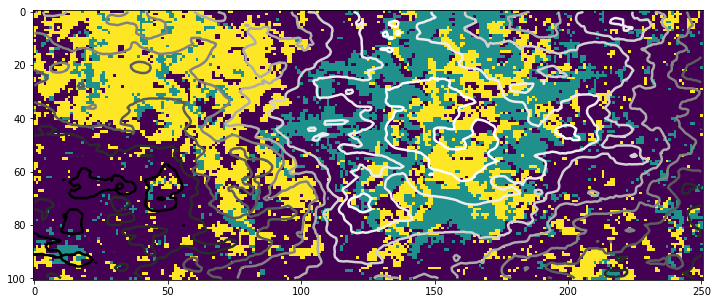

In [146]:
print(zs.shape)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
res_indicator = np.zeros((25351, 1))
res_indicator[np.where((zs[:, 0]>-0.55) & (zs[:, 1]<0.25))] = 1
res_indicator[np.where((zs[:, 0]<-0.55))] = 2
res_indicator[np.where((zs[:, 0]>-0.55) & (zs[:, 1]>0.25))] = 3
sc = ax.imshow(res_indicator.reshape(traces.shape[0], traces.shape[1]), cmap="viridis")
c1 = ax.contour(X, Y, horizon, alpha=1.0, levels=np.linspace(horizon.min(), horizon.max(), 10), linewidths=2.5, cmap="Greys")
#fig.colorbar(sc)
fig.savefig("unsupervised_labeling_of_encoder_space_with_surface.png", dpi=300, bbox_inches="tight")
#ax.scatter([138], [38], s=100, color="red")

In [147]:
import pandas as pd

In [32]:
synthetics = pd.read_csv("./megasynt.csv")
synthetics['WELL']=synthetics['WELL'].astype('category')
synthetics['ID']=synthetics['ID'].astype('category')
synthetics.head()

,TWT,DEPTH,VP,VS,RHO,NEAR,FAR,WELL,ID
0,2.568,2100.822816,2429.415852,1018.341144,2.255582,-1.215363e-10,-8.058615e-11,W155_5,Z40_Sw025_Por20
1,2.572,2105.563679,2429.415852,1018.341144,2.255582,-3.881229e-09,-2.573498e-09,W155_5,Z40_Sw025_Por20
2,2.576,2110.183740,2429.415852,1018.341144,2.255582,-9.194981e-08,-6.096849e-08,W155_5,Z40_Sw025_Por20
3,2.580,2114.912341,2429.415852,1018.341144,2.255582,-1.611343e-06,-1.068421e-06,W155_5,Z40_Sw025_Por20
4,2.584,2119.814871,2429.415852,1018.341144,2.255582,-2.080550e-05,-1.379535e-05,W155_5,Z40_Sw025_Por20


In [59]:
unique_names = np.unique(synthetics['ID'])
print(unique_names)

z_vals, sw_vals, por_vals = [], [], []
for max_cor in tqdm(unique_names):
    splt = max_cor.split("_")
    z_val = float(splt[0][1:])
    sw_val = float(splt[1].strip("Sw"))
    por_val = float(splt[2][3:])
    #print(z_val, sw_val, por_val)
    z_vals.append(z_val)
    sw_vals.append(sw_val)
    por_vals.append(por_val)
    
print(sw_vals)

['Z00_Sw000_Por20' 'Z00_Sw000_Por25' 'Z00_Sw000_Por30' 'Z00_Sw000_Por35'
 'Z00_Sw025_Por20' 'Z00_Sw025_Por25' 'Z00_Sw025_Por30' 'Z00_Sw025_Por35'
 'Z00_Sw050_Por20' 'Z00_Sw050_Por25' 'Z00_Sw050_Por30' 'Z00_Sw050_Por35'
 'Z00_Sw075_Por20' 'Z00_Sw075_Por25' 'Z00_Sw075_Por30' 'Z00_Sw075_Por35'
 'Z00_Sw100_Por20' 'Z00_Sw100_Por25' 'Z00_Sw100_Por30' 'Z00_Sw100_Por35'
 'Z20_Sw000_Por20' 'Z20_Sw000_Por25' 'Z20_Sw000_Por30' 'Z20_Sw000_Por35'
 'Z20_Sw025_Por20' 'Z20_Sw025_Por25' 'Z20_Sw025_Por30' 'Z20_Sw025_Por35'
 'Z20_Sw050_Por20' 'Z20_Sw050_Por25' 'Z20_Sw050_Por30' 'Z20_Sw050_Por35'
 'Z20_Sw075_Por20' 'Z20_Sw075_Por25' 'Z20_Sw075_Por30' 'Z20_Sw075_Por35'
 'Z20_Sw100_Por20' 'Z20_Sw100_Por25' 'Z20_Sw100_Por30' 'Z20_Sw100_Por35'
 'Z40_Sw000_Por20' 'Z40_Sw000_Por25' 'Z40_Sw000_Por30' 'Z40_Sw000_Por35'
 'Z40_Sw025_Por20' 'Z40_Sw025_Por25' 'Z40_Sw025_Por30' 'Z40_Sw025_Por35'
 'Z40_Sw050_Por20' 'Z40_Sw050_Por25' 'Z40_Sw050_Por30' 'Z40_Sw050_Por35'
 'Z40_Sw075_Por20' 'Z40_Sw075_Por25' 'Z40_Sw075_Por


[0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 75.0, 75.0, 75.0, 75.0, 100.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 75.0, 75.0, 75.0, 75.0, 100.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 75.0, 75.0, 75.0, 75.0, 100.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 75.0, 75.0, 75.0, 75.0, 100.0, 100.0, 100.0, 100.0]


In [34]:
synthetics_well = []
for name in unique_names:
    well = synthetics.loc[synthetics['ID'] == name]
    synthetics_well.append([well['NEAR'], well['FAR']])
synthetics_well = np.array(synthetics_well)

In [172]:
np.save("pseudos.npy", synthetics_well)

[-5.01439318e-12 -1.60133369e-10 -3.79370339e-09 -6.64814588e-08
 -8.58401931e-07 -8.12178760e-06 -5.58583291e-05 -2.75758747e-04
 -9.56281584e-04 -2.23169866e-03 -3.13838232e-03 -1.50348293e-03
  3.13074138e-03  6.84658839e-03  5.45391931e-03  5.84892606e-04
 -2.80190267e-03 -3.14587271e-03 -2.96947605e-03 -5.48957487e-03
 -1.16857264e-02 -1.62734151e-02 -7.78811185e-03  1.62114245e-02
  3.54532280e-02  2.82433773e-02  3.05171987e-03 -1.42910919e-02
 -1.47922385e-02 -7.98241566e-03 -2.78452681e-03 -6.70575563e-04
 -1.14854136e-04 -1.42205233e-05 -1.28554176e-06 -8.54130932e-08
 -4.19019222e-09 -1.52291219e-10 -4.11099199e-12 -8.25846025e-14
 -1.23652672e-15 -1.38165580e-17 -1.15326544e-19 -7.19709040e-22
 -3.36038321e-24 -1.17458297e-26 -3.07512462e-29 -6.03276222e-32
 -8.87174908e-35 -9.78331369e-38 -8.09231892e-41 -5.02206225e-44
 -2.33890473e-47 -8.17622466e-51 -2.14576528e-54 -4.22836046e-58
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

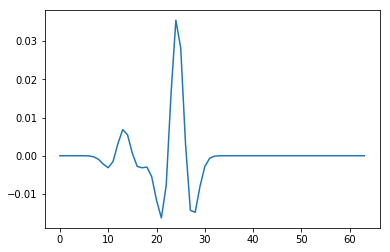

In [35]:
print(synthetics_well[-1, 0])
plt.plot(synthetics_well[-1, 0])

In [36]:
pseudo_rec = np.load("vae3/pseudos_out.npy")
pseudo_zs = np.load("vae3/pseudos_out_zs.npy")
print(pseudo_zs.shape)
print(pseudo_zs)

(80, 2)
[[ 0.2768084  -0.17862844]
 [ 0.2768084  -0.17862844]
 [ 0.2768084  -0.17862844]
 [ 0.2768084  -0.17862844]
 [ 0.2954672  -0.14222817]
 [ 0.2954672  -0.14222817]
 [ 0.2954672  -0.14222817]
 [ 0.2954672  -0.14222817]
 [ 0.3127429  -0.09190238]
 [ 0.3127429  -0.09190238]
 [ 0.3127429  -0.09190238]
 [ 0.3127429  -0.09190238]
 [ 0.32831162 -0.04677846]
 [ 0.32831162 -0.04677846]
 [ 0.32831162 -0.04677846]
 [ 0.32831162 -0.04677846]
 [ 0.3378229  -0.00668745]
 [ 0.3378229  -0.00668745]
 [ 0.3378229  -0.00668745]
 [ 0.3378229  -0.00668745]
 [ 0.40753478  1.7480326 ]
 [ 0.35645348  0.61585206]
 [ 0.25537997 -0.24324332]
 [ 0.17787376 -1.0733489 ]
 [ 0.39115345  1.9050453 ]
 [ 0.36319584  0.73363006]
 [ 0.3215323  -0.14967111]
 [ 0.1251109  -0.8683789 ]
 [ 0.37467244  2.06106   ]
 [ 0.3655651   0.83611846]
 [ 0.3572601  -0.04987105]
 [ 0.09310232 -0.7211041 ]
 [ 0.3584141   2.2145479 ]
 [ 0.36200687  0.9277125 ]
 [ 0.36637288  0.07651633]
 [ 0.09502542 -0.5607852 ]
 [ 0.3437242   2.359

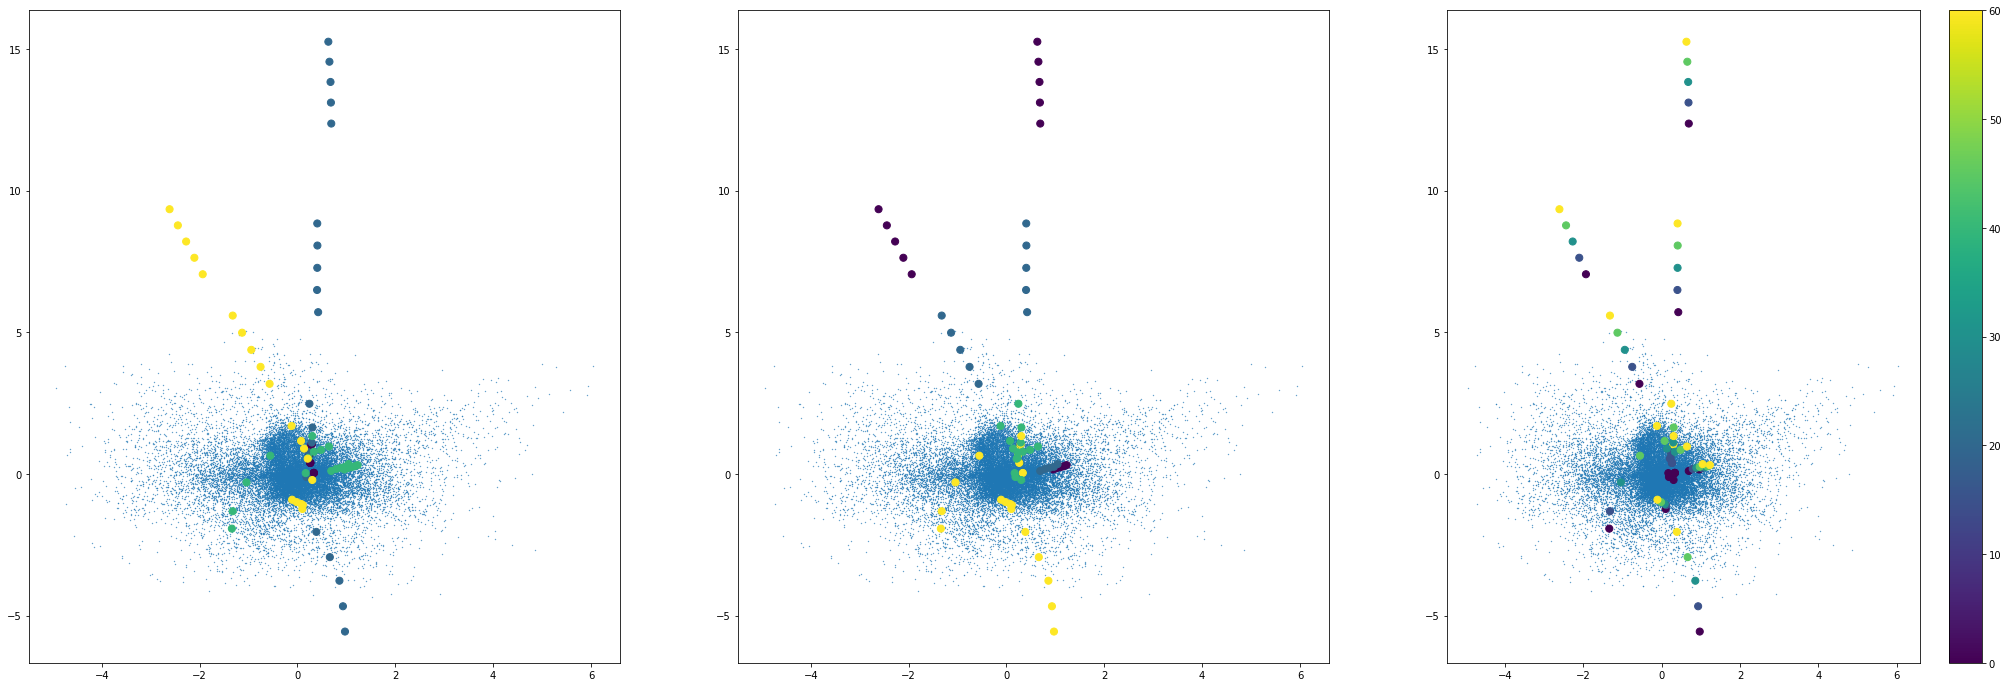

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(36, 12))
for i in range(3):
    sc = ax[i].scatter(zs[:, 0], zs[:, 1], s=0.1)#, c=np.min(FF, 2).reshape(-1))
#fig.colorbar(sc)
#ax.axvline(-0.55, color="black", linestyle="--", linewidth=2)
#ax.axhline(0.25, linestyle="-", color="black", linewidth=2)

#ax.scatter(cleaned_mapped[:, 0], cleaned_mapped[:, 1], s=2, color="green")#, c=np.min(FF, 2).reshape(-1))
#ax.scatter(pseudo_zs[:, 0], pseudo_zs[:, 1], s=10, color="red")#, c=np.min(FF, 2).reshape(-1)
sc = ax[1].scatter(pseudo_pi[:, 0], pseudo_pi[:, 1], s=50, c=por_vals)
sc = ax[2].scatter(pseudo_pi[:, 0], pseudo_pi[:, 1], s=50, c=sw_vals)
sf = ax[0].scatter(pseudo_pi[:, 0], pseudo_pi[:, 1], s=50, c=z_vals)
fig.colorbar(sf)
#fig.savefig("unsupervised_encoder_space_with_pseudo_wells_calibrated_triple.png", dpi=300, bbox_inches="tight")

In [183]:
np.save("cleaned_real.npy",all_sampled)

In [40]:
cleaned_mapped = np.load("./vae3/cl_out_zs.npy")

In [39]:
pseudo_pi = np.load("./vae3/psscale_out_zs.npy")

In [42]:
import pandas as pd
synthetics = pd.read_csv("./syntdataset_W155_X.csv")
synthetics['WELL']=synthetics['WELL'].astype('category')
synthetics['ID']=synthetics['ID'].astype('category')
synthetics.head()

,TWT,DEPTH,VP,VS,RHO,NEAR,FAR,WELL,ID
0,2.568,2100.822816,2429.415852,1018.341144,2.255582,-6.083937e-11,-3.298863e-11,W155_X,Z60_Sw025_Por30
1,2.572,2105.563679,2429.415852,1018.341144,2.255582,-1.942890e-09,-1.053484e-09,W155_X,Z60_Sw025_Por30
2,2.576,2110.183740,2429.415852,1018.341144,2.255582,-4.602880e-08,-2.495797e-08,W155_X,Z60_Sw025_Por30
3,2.580,2114.912341,2429.415852,1018.341144,2.255582,-8.066160e-07,-4.373674e-07,W155_X,Z60_Sw025_Por30
4,2.584,2119.814871,2429.415852,1018.341144,2.255582,-1.041495e-05,-5.647245e-06,W155_X,Z60_Sw025_Por30


In [43]:
unique_names = np.unique(synthetics['ID'])
print(unique_names)

['Z00_Sw000_Por20' 'Z00_Sw000_Por25' 'Z00_Sw000_Por30' 'Z00_Sw000_Por35'
 'Z00_Sw025_Por20' 'Z00_Sw025_Por25' 'Z00_Sw025_Por30' 'Z00_Sw025_Por35'
 'Z00_Sw050_Por20' 'Z00_Sw050_Por25' 'Z00_Sw050_Por30' 'Z00_Sw050_Por35'
 'Z00_Sw075_Por20' 'Z00_Sw075_Por25' 'Z00_Sw075_Por30' 'Z00_Sw075_Por35'
 'Z00_Sw100_Por20' 'Z00_Sw100_Por25' 'Z00_Sw100_Por30' 'Z00_Sw100_Por35'
 'Z20_Sw000_Por20' 'Z20_Sw000_Por25' 'Z20_Sw000_Por30' 'Z20_Sw000_Por35'
 'Z20_Sw025_Por20' 'Z20_Sw025_Por25' 'Z20_Sw025_Por30' 'Z20_Sw025_Por35'
 'Z20_Sw050_Por20' 'Z20_Sw050_Por25' 'Z20_Sw050_Por30' 'Z20_Sw050_Por35'
 'Z20_Sw075_Por20' 'Z20_Sw075_Por25' 'Z20_Sw075_Por30' 'Z20_Sw075_Por35'
 'Z20_Sw100_Por20' 'Z20_Sw100_Por25' 'Z20_Sw100_Por30' 'Z20_Sw100_Por35'
 'Z40_Sw000_Por20' 'Z40_Sw000_Por25' 'Z40_Sw000_Por30' 'Z40_Sw000_Por35'
 'Z40_Sw025_Por20' 'Z40_Sw025_Por25' 'Z40_Sw025_Por30' 'Z40_Sw025_Por35'
 'Z40_Sw050_Por20' 'Z40_Sw050_Por25' 'Z40_Sw050_Por30' 'Z40_Sw050_Por35'
 'Z40_Sw075_Por20' 'Z40_Sw075_Por25' 'Z40_Sw075_Por

In [44]:
synthetics_well = []
for name in unique_names:
    well = synthetics.loc[synthetics['ID'] == name]
    synthetics_well.append([well['NEAR'], well['FAR']])
synthetics_well = np.array(synthetics_well)

In [262]:
np.save("pseudos2.npy", synthetics_well)

[-3.71664559e-11 -1.18690130e-09 -2.81187583e-08 -4.92757572e-07
 -6.36243637e-06 -6.01983231e-05 -4.14019414e-04 -2.04391138e-03
 -7.08791593e-03 -1.65412497e-02 -2.32615481e-02 -1.11437474e-02
  2.32049201e-02  5.07467546e-02  4.04268405e-02  4.36924239e-03
 -2.04454606e-02 -2.11016877e-02 -1.10728454e-02 -2.76171127e-03
  1.89659068e-03  3.85253202e-03  1.90400820e-03 -4.00899214e-03
 -8.76334761e-03 -6.98111848e-03 -7.54315080e-04  3.53242870e-03
  3.65630062e-03  1.97306927e-03  6.88270886e-04  1.65750832e-04
  2.83892967e-05  3.51498580e-06  3.17756310e-07  2.11121491e-08
  1.03571899e-09  3.76428813e-11  1.01614252e-12  2.04130114e-14
  3.05640921e-16  3.41513487e-18  2.85060652e-20  1.77895496e-22
  8.30609323e-25  2.90329854e-27  7.60099969e-30  1.49115985e-32
  2.19289201e-35  2.41820978e-38  2.00023483e-41  1.24133810e-44
  5.78123371e-48  2.02097439e-51  5.30383749e-55  1.04515330e-58
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

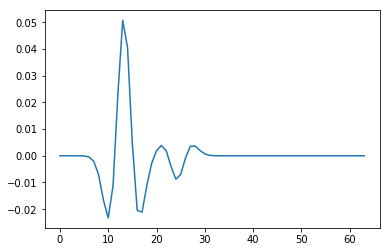

In [45]:
print(synthetics_well[-1, 0])
plt.plot(synthetics_well[-1, 0])

In [46]:
pseudo_rec = np.load("vae3/pseudos2_out.npy")
pseudo_zs = np.load("vae3/pseudos2_out_zs.npy")
print(pseudo_zs.shape)
print(pseudo_zs)

(80, 2)
[[ 0.33465397 -0.06168342]
 [ 0.33465397 -0.06168342]
 [ 0.33465397 -0.06168342]
 [ 0.33465397 -0.06168342]
 [ 0.3179443   0.15095535]
 [ 0.3179443   0.15095535]
 [ 0.3179443   0.15095535]
 [ 0.3179443   0.15095535]
 [ 0.26631615  0.4052515 ]
 [ 0.26631615  0.4052515 ]
 [ 0.26631615  0.4052515 ]
 [ 0.26631615  0.4052515 ]
 [ 0.24300945  0.6198632 ]
 [ 0.24300945  0.6198632 ]
 [ 0.24300945  0.6198632 ]
 [ 0.24300945  0.6198632 ]
 [ 0.25255376  0.79435045]
 [ 0.25255376  0.79435045]
 [ 0.25255376  0.79435045]
 [ 0.25255376  0.79435045]
 [ 0.6659751  12.398447  ]
 [ 0.46347386  7.40872   ]
 [ 0.36959735  2.4722347 ]
 [ 0.20525032 -0.9846453 ]
 [ 0.66469884 12.925571  ]
 [ 0.4727304   7.9797072 ]
 [ 0.34716165  3.10722   ]
 [ 0.08614211 -0.5829613 ]
 [ 0.6599879  13.45      ]
 [ 0.47817433  8.553254  ]
 [ 0.3265803   3.7359977 ]
 [ 0.20027    -0.19334327]
 [ 0.6535246  13.970299  ]
 [ 0.4771285   9.125301  ]
 [ 0.30737314  4.345293  ]
 [ 0.22154513  0.44120187]
 [ 0.63876295 14.485

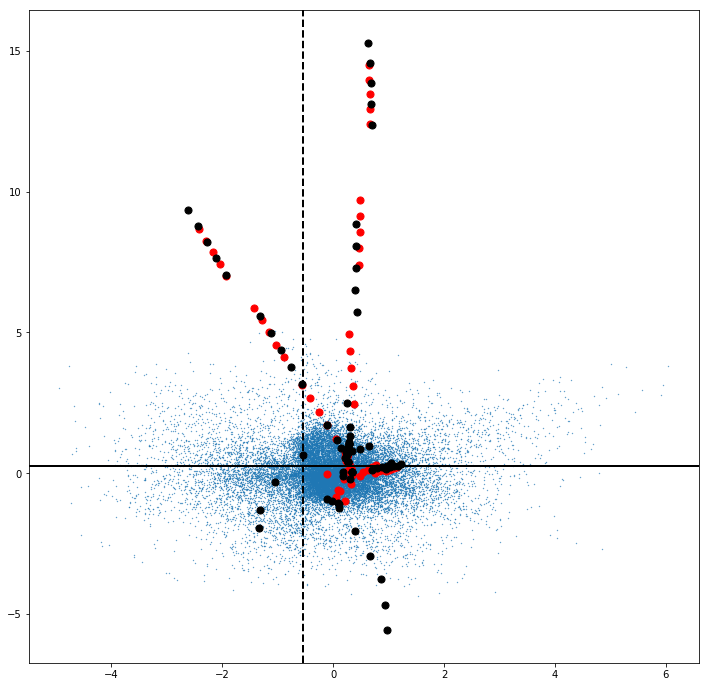

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sc = ax.scatter(zs[:, 0], zs[:, 1], s=0.1)#, c=np.min(FF, 2).reshape(-1))
#ax.scatter(zs[counts, 0], zs[counts, 1], s=50, c="red")
#fig.colorbar(sc)
ax.axvline(-0.55, color="black", linestyle="--", linewidth=2)
ax.axhline(0.25, linestyle="-", color="black", linewidth=2)

#ax.scatter(cleaned_mapped[:, 0], cleaned_mapped[:, 1], s=2, color="green")#, c=np.min(FF, 2).reshape(-1))
#ax.scatter(pseudo_zs[:, 0], pseudo_zs[:, 1], s=50, color="red")#, c=np.min(FF, 2).reshape(-1)
ax.scatter(pseudo_pi[:, 0], pseudo_pi[:, 1], s=50, color="black")
#fig.savefig("unsupervised_encoder_space_with_superstack.png", dpi=300, bbox_inches="tight")

(25351, 2)


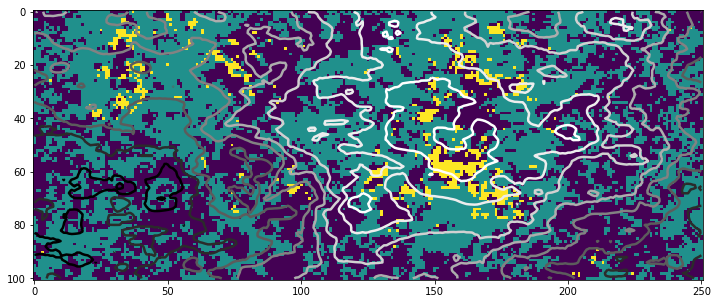

In [269]:
print(zs.shape)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
res_indicator = np.zeros((25351, 1))
res_indicator[np.where((zs[:, 0]>0) & (zs[:, 1]<1.5))] = 1
res_indicator[np.where((zs[:, 0]<0))] = 2
res_indicator[np.where((zs[:, 0]>-0.55) & (zs[:, 1]>1.5))] = 3
sc = ax.imshow(res_indicator.reshape(traces.shape[0], traces.shape[1]), cmap="viridis")
c1 = ax.contour(X, Y, horizon, alpha=1.0, levels=np.linspace(horizon.min(), horizon.max(), 10), linewidths=2.5, cmap="Greys")
#fig.colorbar(sc)
#fig.savefig("unsupervised_labeling_of_encoder_space_with_surface.png", dpi=300, bbox_inches="tight")
#ax.scatter([138], [38], s=100, color="red")

cross

In [12]:
from scipy.signal import correlate

/home/lm715/anaconda2/envs/dlenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/lm715/anaconda2/envs/dlenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [280]:
from tqdm import tqdm_notebook as tqdm
well_synth_1 = synthetics_well[0, 0]*23932

all_correlations = []
for sw, name in zip(synthetics_well, unique_names):
    sw = sw*23932/1327*np.pi**2
    corrs = []
    for trace in tqdm(near_traces.reshape(-1, 64)):
        corr = np.max(correlate(trace, sw[0]))
        corrs.append([corr, name])
    break

#dtype = [('corr', float), ('name', str)]

#corrs = np.array(corrs, dtype=dtype)
print(np.sort(corrs, axis=0)[0:10])

/home/lm715/anaconda2/envs/dlenv/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


[['10.005751822919915' 'Z00_Sw000_Por20']
 ['10.006892611160989' 'Z00_Sw000_Por20']
 ['10.007591634353666' 'Z00_Sw000_Por20']
 ['10.008811150715715' 'Z00_Sw000_Por20']
 ['10.00925280520416' 'Z00_Sw000_Por20']
 ['10.012072441853983' 'Z00_Sw000_Por20']
 ['10.012974294806714' 'Z00_Sw000_Por20']
 ['10.015664084762673' 'Z00_Sw000_Por20']
 ['10.01916741929378' 'Z00_Sw000_Por20']
 ['10.021270815536024' 'Z00_Sw000_Por20']]


In [21]:
from tqdm import tqdm_notebook as tqdm
well_synth_1 = synthetics_well[0, 0]*23932

all_correlations = []

traces_max_name = []
traces_max_corr = []


for trace in tqdm(near_sampled.reshape(-1, 64)):
    corrs = []
    names = []
    for sw, name in zip(synthetics_well, unique_names):
        sw = sw*23932/1327*np.pi**2
        corr = np.max(correlate(trace, sw[0]))
        corrs.append(corr)
        names.append(name)
    corrs = np.array(corrs)
    names = np.array(names)
    values = corrs
    inds = values.argsort(kind="max")
    sorted_names = names[inds]
    traces_max_name.append(sorted_names[-1])
    traces_max_corr.append(corrs[inds][-1])

#dtype = [('corr', float), ('name', str)]

#corrs = np.array(corrs, dtype=dtype)
#print(np.sort(corrs, axis=0))

/home/lm715/anaconda2/envs/dlenv/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


In [25]:
z_vals, sw_vals, por_vals = [], [], []
for max_cor in tqdm(traces_max_name):
    splt = max_cor.split("_")
    z_val = float(splt[0][1:])
    sw_val = float(splt[1][3:])
    por_val = float(splt[2][3:])
    #print(z_val, sw_val, por_val)
    z_vals.append(z_val)
    sw_vals.append(sw_val)
    por_vals.append(por_val)